<a href="https://colab.research.google.com/github/spalacioc05/Proyecto-Modelos1/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**01 - Exploración**
####***Santiago Palacio Cárdenas***
####***Sarai Restrepo Rodríguez***
####***Natalia Bernal Gutiérrez***

##**1. Librerías y Dataset**

###**1.1 Importamos librerías**

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**1.2 Importamos el dataset desde Kaggle**

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 697MB/s]


In [3]:
!unzip udea*.zip > /dev/null
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


Cargamos el dataset de entrenamiento

In [4]:
train_df = pd.read_csv('train.csv')

##**2. Análisis exploratorio de Datos**

###**2.1 Visualización general de los datos**

In [5]:
print("Primeras filas del DataFrame:")
display(train_df.head())

Primeras filas del DataFrame:


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [6]:
print("Dimensiones del DataFrame:")
print(train_df.shape)
print("Lo que signifca que el Dataset contiene " + str(train_df.shape[0]) + " filas y " + str(train_df.shape[1]) + " columnas.")

Dimensiones del DataFrame:
(692500, 21)
Lo que signifca que el Dataset contiene 692500 filas y 21 columnas.


In [7]:
print("Información general del DataFrame:")
display(train_df.info(memory_usage=False))

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO  

None

In [8]:
print("Valores únicos por columna:")
train_df.nunique()

Valores únicos por columna:


,0
ID,692500
PERIODO_ACADEMICO,9
E_PRGM_ACADEMICO,948
E_PRGM_DEPARTAMENTO,31
E_VALORMATRICULAUNIVERSIDAD,8
E_HORASSEMANATRABAJA,5
F_ESTRATOVIVIENDA,7
F_TIENEINTERNET,2
F_EDUCACIONPADRE,12
F_TIENELAVADORA,2


###**2.2 Datos faltantes**

In [9]:
print("Cantidad de datos faltantes por columna en orden descendente:")
display(train_df.isnull().sum().sort_values(ascending=False))

Cantidad de datos faltantes por columna en orden descendente:


,0
F_TIENEAUTOMOVIL,43623
F_TIENELAVADORA,39773
F_TIENECOMPUTADOR,38103
F_ESTRATOVIVIENDA,32137
E_HORASSEMANATRABAJA,30857
F_TIENEINTERNET.1,26629
F_TIENEINTERNET,26629
F_EDUCACIONMADRE,23664
F_EDUCACIONPADRE,23178
E_PAGOMATRICULAPROPIO,6498


Podemos ver que la columna con más datos faltante es **FAMI_TIENEAUTOMOVIL** con **43623** filas sin respuesta

In [10]:
print("Proporción de datos faltantes por columna en orden descendente:")
display(train_df.isnull().mean().sort_values(ascending=False))

Proporción de datos faltantes por columna en orden descendente:


,0
F_TIENEAUTOMOVIL,0.062994
F_TIENELAVADORA,0.057434
F_TIENECOMPUTADOR,0.055022
F_ESTRATOVIVIENDA,0.046407
E_HORASSEMANATRABAJA,0.044559
F_TIENEINTERNET.1,0.038453
F_TIENEINTERNET,0.038453
F_EDUCACIONMADRE,0.034172
F_EDUCACIONPADRE,0.033470
E_PAGOMATRICULAPROPIO,0.009383


Podemos ver que los datos faltantes no representan un porcentaje significativo de los datos totales siendo el mayor de ellos solo un **6.3%** del total

###**2.3 Análisis de las columnas numéricas**

In [11]:
display(train_df.describe())

,ID,PERIODO_ACADEMICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


**ID** y **PERIODO** son tomadas como columnas numéricas a pesar de no serlo, esto tendrá que ser cambiado después, además podemos ver que los coeficientes parecen ser valores entre 0 y 1 *(aunque lo máximo que alcanzan es 0.65)* y tienen todos una media de **0.26** aproximadamente

###**2.4 Posible columna redundante**

Con lo visto anteriormente en el dataset notamos la existencia de dos columnas bastante parecidas **FAMI_TIENEINTERNET** y **FAMI_TIENEINTERNET.1** intentemos compararlas para determinar en que se diferencian o parecen

In [12]:
print("Comparación entre las columnas F_TIENEINTERNET y F_TIENEINTERNET.1:")
display(train_df['F_TIENEINTERNET'].equals(train_df['F_TIENEINTERNET.1']))

Comparación entre las columnas F_TIENEINTERNET y F_TIENEINTERNET.1:


True

Como podemos ver a partir de la comparativa ambas columnas son exactamente iguales *(cosa que ya intuíamos debido a que tenían el mismo número de NaNs)*, lo que significa que podemos eliminar una de las columnas sin problema

In [13]:
#Dropeamos la columna duplicada
train_df.drop(columns=['F_TIENEINTERNET.1'], inplace=True)

##**3. Limpieza y preprocesado**



###**3.1 Imputación de datos nulos**

Debido a que las columnas con datos faltantes son de tipo categórico y no discreto tenemos dos opciones simples entre las que elegir, imputar los datos faltantes usando la moda o simplemente eliminar las filas con datos nulos.

In [14]:
#Opción 1: Llenamos los datos faltantes de acuerdo a la moda
cols_with_missing = train_df.columns[train_df.isnull().sum() > 0].tolist()
for col in cols_with_missing:
    # Imputamos con la moda
    if train_df[col].dtype == 'object':
        mode_value = train_df[col].mode()[0]
        train_df[col].fillna(mode_value, inplace=True)

/tmp/ipython-input-3642444350.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mode_value, inplace=True)


In [15]:
#Opción 2: Eliminamos todas las columnas que contengan datos faltantes
#train_df.dropna(inplace=True)

In [16]:
print("Cantidad de datos faltantes después de imputación:")
display(train_df.isnull().sum())

Cantidad de datos faltantes después de imputación:


,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0


###**3.2 One-hot encoding**

In [17]:
#Seleccionamos las columnas categóricas y excluimos la variable a predecir y aquellas que nos llevan al infierno de la dimensionalidad
# Columnas a excluir
excluded_cols = [
    'RENDIMIENTO_GLOBAL',
    'E_PRGM_ACADEMICO',
    'E_PRGM_DEPARTAMENTO',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE',
    'E_VALORMATRICULAUNIVERSIDAD'
]

# Seleccionar las columnas categóricas que no están en excluded_cols
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
nominal_cols = [col for col in categorical_cols if col not in excluded_cols]

In [18]:
#Aplicamos el one-hot encoding
encoded_dfs = []
for col in nominal_cols:
    #Convertimos a string por seguridad xD
    train_df[col] = train_df[col].astype(str)
    one_hot = pd.get_dummies(train_df[col], prefix=col)
    encoded_dfs.append(one_hot)

In [19]:
#Concatenamos las nuevas columnas y dropeamos las originales
train_df = pd.concat([train_df] + encoded_dfs, axis=1)
train_df.drop(columns=nominal_cols, inplace=True)

In [20]:
train_df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,...,F_TIENELAVADORA_No,F_TIENELAVADORA_Si,F_TIENEAUTOMOVIL_No,F_TIENEAUTOMOVIL_Si,E_PRIVADO_LIBERTAD_N,E_PRIVADO_LIBERTAD_S,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si,F_TIENECOMPUTADOR_No,F_TIENECOMPUTADOR_Si
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Técnica o tecnológica incompleta,Postgrado,medio-alto,0.322,0.208,...,False,True,False,True,True,False,True,False,False,True
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,0.311,0.215,...,False,True,True,False,True,False,True,False,False,True
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,0.297,0.214,...,False,True,True,False,True,False,True,False,True,False
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,No sabe,Secundaria (Bachillerato) completa,alto,0.485,0.172,...,False,True,True,False,True,False,True,False,False,True
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Primaria completa,Primaria completa,medio-bajo,0.316,0.232,...,False,True,False,True,True,False,True,False,False,True


###**3.3 Label encoding**

In [21]:
#Aplicamos el Label encoding a la variable de interés
orden_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

train_df['RG_Encoded'] = train_df['RENDIMIENTO_GLOBAL'].map(orden_rendimiento)

In [22]:
train_df[['RENDIMIENTO_GLOBAL', 'RG_Encoded']].head(10)

,RENDIMIENTO_GLOBAL,RG_Encoded
0,medio-alto,2
1,bajo,0
2,bajo,0
3,alto,3
4,medio-bajo,1
5,medio-alto,2
6,alto,3
7,medio-bajo,1
8,medio-bajo,1
9,alto,3


## **4. Visualización de datos**

###**4.1 Distribución de los datos por Periodos en el dataset**

In [23]:
#Contamos las ocurrencias de los valores únicos
periodo_counts = train_df['PERIODO_ACADEMICO'].value_counts().sort_index()

/tmp/ipython-input-4067616796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=periodo_counts.index, y=periodo_counts.values, palette='viridis')


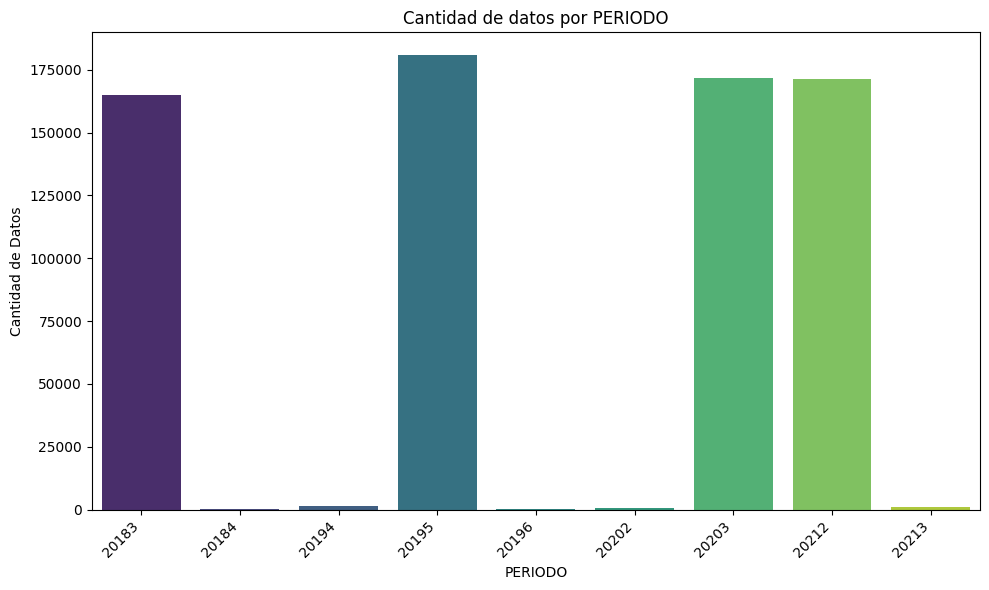

In [24]:
# Create a bar plot using the counts obtained
plt.figure(figsize=(10, 6))
sns.barplot(x=periodo_counts.index, y=periodo_counts.values, palette='viridis')

# Add a title to the plot
plt.title("Cantidad de datos por PERIODO")

# Add labels to the x and y axes
plt.xlabel("PERIODO")
plt.ylabel("Cantidad de Datos")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### **4.2 Distribución de estratos**

/tmp/ipython-input-4259419040.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estrato_names, y=estrato_counts.values, palette='viridis')


<Figure size 1000x600 with 0 Axes>

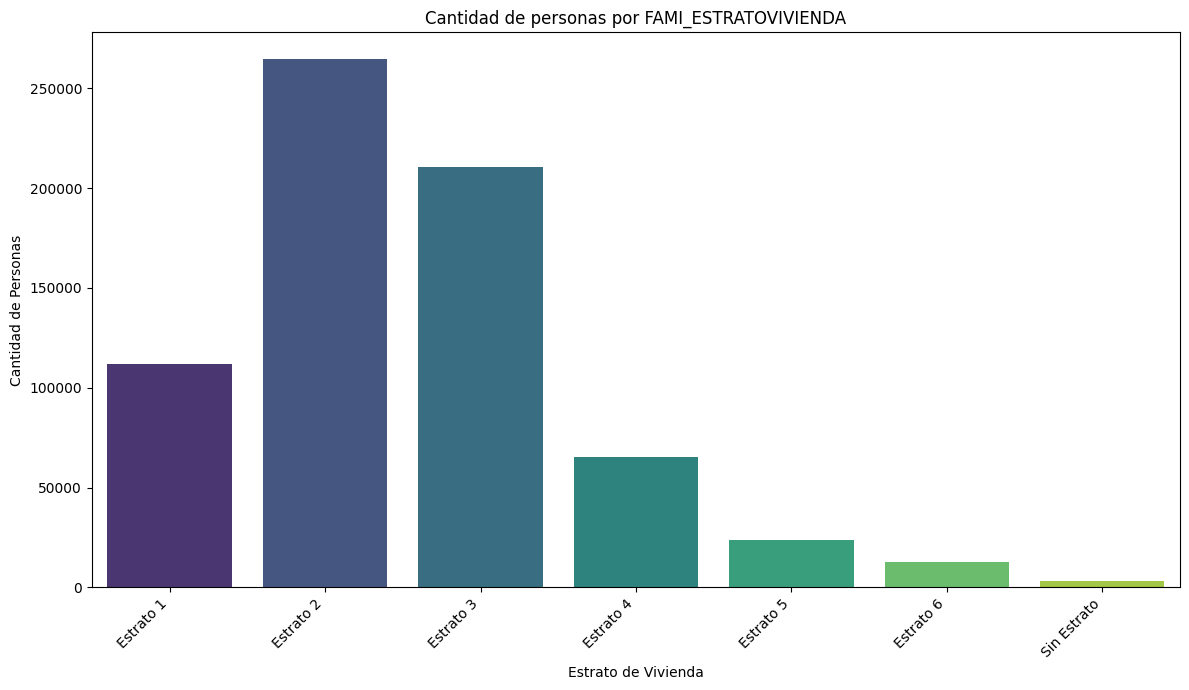

In [25]:
# Create a bar plot using the counts obtained
plt.figure(figsize=(10, 6))
fami_estrato_cols = [col for col in train_df.columns if col.startswith('F_ESTRATOVIVIENDA_')]

# Sum the 'True' values for each stratum column to get the counts
estrato_counts = train_df[fami_estrato_cols].sum()

# Extract stratum names from the column names
estrato_names = [col.replace('F_ESTRATOVIVIENDA_', '') for col in estrato_counts.index]

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=estrato_names, y=estrato_counts.values, palette='viridis')

# Add a descriptive title to the plot
plt.title("Cantidad de personas por FAMI_ESTRATOVIVIENDA")

# Label the x-axis as "Estrato de Vivienda" and the y-axis as "Cantidad de Personas"
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Cantidad de Personas")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

###**4.3 Distribución de datos por departamento**

/tmp/ipython-input-75961285.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=departamento_percentages.index, y=departamento_percentages.values, palette='viridis')


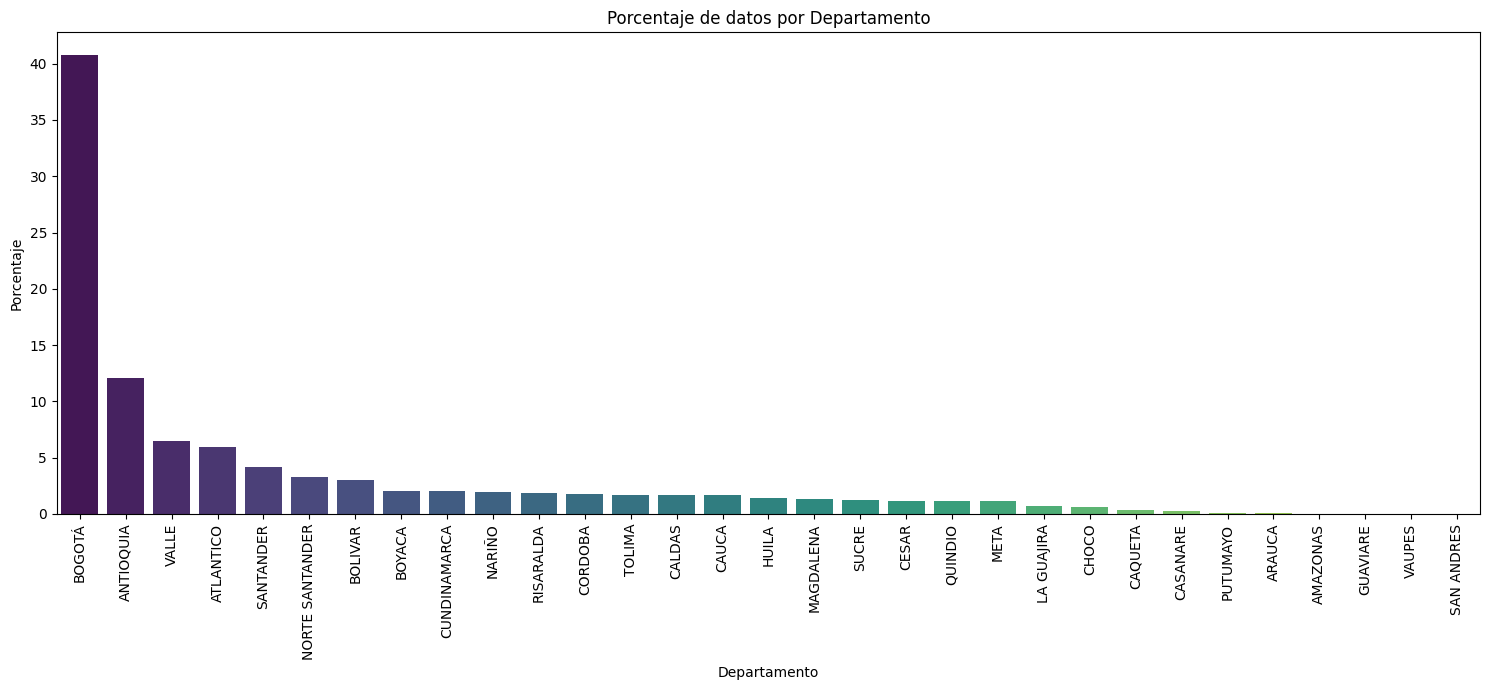

In [26]:
# Calculate the percentage of data points for each unique value in 'ESTU_PRGM_DEPARTAMENTO'
departamento_counts = train_df['E_PRGM_DEPARTAMENTO'].value_counts()

# Calculate percentages
total_data_points = len(train_df)
departamento_percentages = (departamento_counts / total_data_points) * 100

# Sort the percentages in descending order
departamento_percentages = departamento_percentages.sort_values(ascending=False)

# Create a bar plot of the calculated percentages
plt.figure(figsize=(15, 7))
sns.barplot(x=departamento_percentages.index, y=departamento_percentages.values, palette='viridis')

# Add a title to the plot
plt.title("Porcentaje de datos por Departamento")

# Label the x-axis as "Departamento" and the y-axis as "Porcentaje"
plt.xlabel("Departamento")
plt.ylabel("Porcentaje")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

###**4.4 Distribución de categorías de rendimiento**

/tmp/ipython-input-3484814296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rendimiento_counts.index, y=rendimiento_counts.values, palette='viridis')


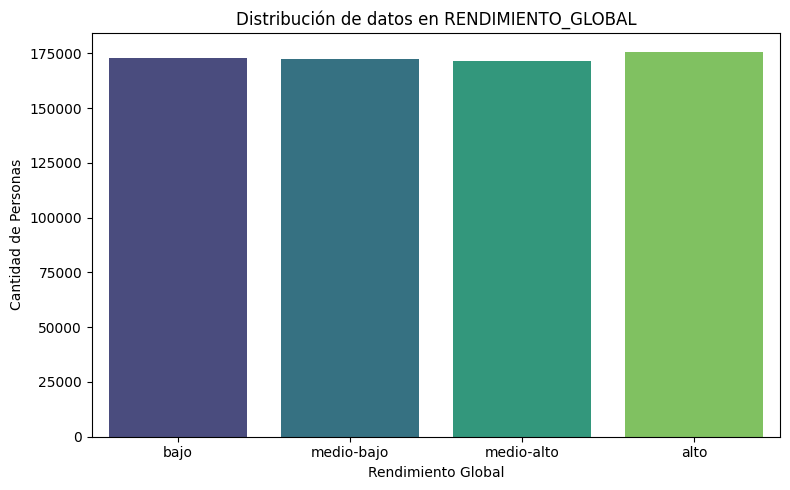

In [27]:
# Count the occurrences of each unique value in the 'RENDIMIENTO_GLOBAL' column
rendimiento_counts = train_df['RENDIMIENTO_GLOBAL'].value_counts()

# Define the order for the ordinal categories to ensure correct plotting order
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Reindex the counts according to the desired order
rendimiento_counts = rendimiento_counts.reindex(orden_rendimiento)

# Create a bar plot using the counts obtained
plt.figure(figsize=(8, 5))
sns.barplot(x=rendimiento_counts.index, y=rendimiento_counts.values, palette='viridis')

# Add a descriptive title to the plot
plt.title("Distribución de datos en RENDIMIENTO_GLOBAL")

# Label the x-axis as "Rendimiento Global" and the y-axis as "Cantidad de Personas"
plt.xlabel("Rendimiento Global")
plt.ylabel("Cantidad de Personas")

# Display the plot
plt.tight_layout()
plt.show()